# Preamble

In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%matplotlib inline

In [3]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

import numpy as np
import pickle

from multiprocessing import Pool 
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from tqdm.notebook import tqdm as tqdm


import integrals as integ
import diff_eq_multi_2 as diff_eq
import physics as phys

# Load the standard solution.
a = pickle.load(open('../data/std_soln_He.p','rb'))

std_Tm = interp1d(a[0,:], a[1,:])
std_xH = interp1d(a[0,:], a[2,:])

In [5]:
# file_str_ary = ['1e7', '3e7', '1e8', '3e8', '1e9', '3e9', '1e10', '3e10', '1e11', '3e11']
file_str_ary = ['10_MeV', '30_MeV', '100_MeV', '300_MeV', '1_GeV', '3_GeV', '10_GeV', '30_GeV', '100_GeV', '300_GeV']

data_ary = []

for ext in file_str_ary:
    
    data = pickle.load(open('/tigress/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/data_Vrel_m_m_'+ext+'_m_C_100_MeV.p','rb'))
    data_ary.append(data)

In [6]:
data_ary = np.array(data_ary)

In [7]:
compressed_data_ary = []

for data in data_ary:
    
    # Only 1+z = 18. 
#     compressed_data_ary.append(data[0][:,:,-9,:])
    
    # All data from 1+z = 10 to 1+z = 31. 
    compressed_data_ary.append(data[0][:,:,-22:,:])

In [8]:
compressed_data_ary = np.array(compressed_data_ary)

In [9]:
# Do an interpolation over the velocities to get the velocity binning required. 

V_rel_arr = np.arange(0., 4.1, 0.103)
Q_arr     = 10**np.arange(-6., 0.2, 0.2)

V_rel_target_arr = np.concatenate((np.arange(0,3.02,0.02), np.arange(3.1,4.1,0.1)))
Q_target_arr = np.logspace(-6, 0, num=90)
# Q_target_arr[-1] = Q_arr[-1]

intermediate_ary = np.zeros((
    compressed_data_ary.shape[0],
    compressed_data_ary.shape[1],
    V_rel_target_arr.size,
    compressed_data_ary.shape[3],
    compressed_data_ary.shape[4]
))

interp_func = interp1d(V_rel_arr, compressed_data_ary, axis=2)

intermediate_ary = interp_func(V_rel_target_arr)

new_compressed_data_ary = np.zeros((
    compressed_data_ary.shape[0],
    Q_target_arr.size,
    V_rel_target_arr.size,
    compressed_data_ary.shape[3],
    compressed_data_ary.shape[4]
))

interp_func = interp1d(Q_arr, intermediate_ary, axis=1)

new_compressed_data_ary = interp_func(Q_target_arr)

print(new_compressed_data_ary.shape)

(10, 90, 161, 22, 6)


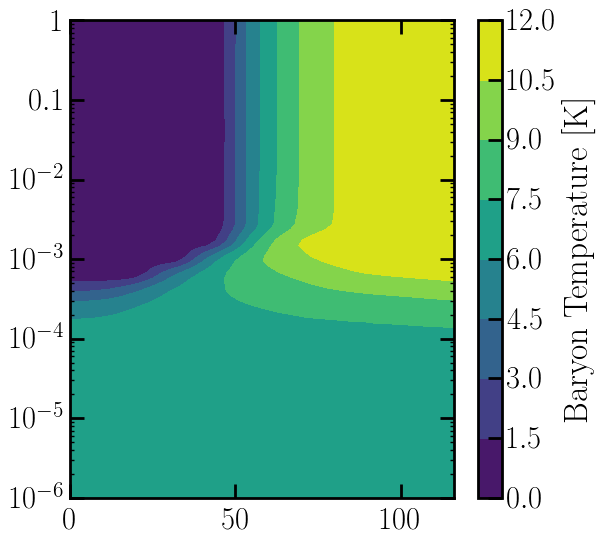

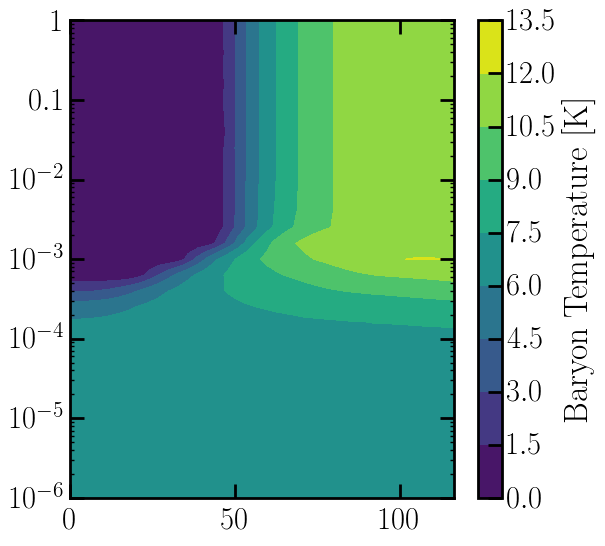

In [10]:
plt.figure()

plt.yscale('log')

Q_arr     = 10**np.arange(-6., 0.2, 0.2) # 31 entries

plt.contourf(V_rel_target_arr * 29, Q_target_arr, new_compressed_data_ary[3,:,:,-9,0]/phys.kB)

plt.colorbar(label='Baryon Temperature [K]')

plt.figure()

plt.yscale('log')

plt.contourf(V_rel_arr * 29, Q_arr, compressed_data_ary[3,:,:,-9,0]/phys.kB)

plt.colorbar(label='Baryon Temperature [K]')

In [11]:
# Only 1+z = 18.
# pickle.dump(compressed_data_ary, 
#             open('/tigress/hongwanl/millicharged_DM_with_bath/Vrel_scan/compressed_Vrel_data.p','wb'))

# 1+z = 10 to 1+z = 31. 
pickle.dump(new_compressed_data_ary[:,:,:,:,0], 
            open('/tigress/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/compressed_Vrel_data_z_9_to_30.p','wb'))

In [27]:
# For Anastasia's Consumption. 
data_path = '/tigress/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/'

np.savetxt(data_path+'Qlis.csv', Q_target_arr, delimiter=",")
np.savetxt(data_path+'Vlis.csv', V_rel_target_arr, delimiter=",")
np.savetxt(data_path+'zlis.csv', np.arange(9, 31), delimiter=",")

z_str_ary = [str(i) for i in np.arange(9, 31)]
out_file_str_ary = ['10MeV', '30MeV', '100MeV', '300MeV', '1GeV', '3GeV', '10GeV', '30GeV', '100GeV', '300GeV']


for data_fixed_m_m,m_m_str in zip(new_compressed_data_ary[:,:,:,:,0], file_str_ary):
    for z,data_fixed_z, z_str in zip(np.arange(9, 31), np.rollaxis(data_fixed_m_m, 2), z_str_ary):
        filename = data_path+'mc100MeV_mm'+m_m_str+'_z_'+z_str+'.csv'
        print(data_fixed_z.shape)
        np.savetxt(filename, data_fixed_z, delimiter=",")




(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)
(90, 161)


# Fine Binned Data

In [7]:
file_str_ary = ['3e8']

data_ary = []

for ext in file_str_ary:
    
    data = pickle.load(open('/tigress/hongwanl/millicharged_DM_with_bath/Vrel_scan/data_Vrel_m_m_'+ext+'_fine_Q_bin.p','rb'))
    data_ary.append(data)

In [8]:
data_ary = np.array(data_ary)

In [9]:
compressed_data_ary = []

for data in data_ary:
    
    compressed_data_ary.append(data[0][:,:,-9,:])

In [10]:
compressed_data_ary = np.array(compressed_data_ary)

In [11]:
pickle.dump(compressed_data_ary, 
            open('/tigress/hongwanl/millicharged_DM_with_bath/Vrel_scan/compressed_Vrel_fine_Q_bin_data.p','wb'))

In [12]:
compressed_data_ary.shape

(1, 71, 40, 6)

# m_C = 340 MeV

In [4]:
file_str_ary = ['3e8']

data_ary = []

for ext in file_str_ary:
    
    data = pickle.load(open('/tigress/hongwanl/millicharged_DM_with_bath/Vrel_scan/data_Vrel_m_m_'+ext+'_m_C_340_MeV.p','rb'))
    data_ary.append(data)

In [5]:
data_ary = np.array(data_ary)

In [6]:
compressed_data_ary = []

for data in data_ary:
    
    compressed_data_ary.append(data[0][:,:,-9,:])

In [7]:
compressed_data_ary = np.array(compressed_data_ary)

In [8]:
pickle.dump(compressed_data_ary, 
            open('/tigress/hongwanl/millicharged_DM_with_bath/Vrel_scan/compressed_Vrel_m_C_340_MeV.p','wb'))

In [9]:
compressed_data_ary.shape

(1, 31, 40, 6)